Project Description...

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 

Description of fnlwgt (final weight)...

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.


#### TARGET--....

The prediction task is to determine whether a person makes over $50K a year.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

#import required accuracy metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [5]:
census=pd.read_csv('census_income.csv')
census

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
census.sample(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
19001,47,Private,323798,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,55,United-States,>50K
20400,42,Self-emp-not-inc,343609,Some-college,10,Separated,Other-service,Unmarried,Black,Female,0,0,50,United-States,<=50K
32108,48,Private,99835,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
12212,26,?,39640,Some-college,10,Never-married,?,Not-in-family,White,Male,0,0,60,United-States,<=50K
14744,33,Private,336061,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,<=50K


In [7]:
census.shape

(32560, 15)

In [8]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
census.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [13]:
census.duplicated().sum()

24

In [17]:
# lets drop duplicates
census.drop_duplicates()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [19]:
# Let's check the value count of all the columns
for i in census.columns:
        print(i,"\n",census[i].value_counts())

Age 
 Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
Workclass 
 Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
Fnlwgt 
 Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: count, Length: 21647, dtype: int64
Education 
 Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4t

We can observe that the columns Workclass,Occupation and Native_country having '? 'values.

In [20]:
#We will replace all '?' with most frequently occuring values of that column because these are categorical columns
census['Workclass'] = census.Workclass.str.replace('?', 'Private')
census['Occupation'] = census.Occupation.str.replace('?', 'Prof-specialty')
census['Native_country'] = census.Native_country.str.replace('?', 'United-States')

In [21]:
census.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


OBSERVATIONS...

1.We have 6 columns of type int and all the others are of type object

2.Target variable is having two results >=50k or <=50k

3.The mean is almost equal to the median for Age, Fnlwgt, Education_num, Hours_per_week

4.The mean has a variation with the median for Capital_gain, Capital_loss

5.Dataset has no null values

6.It looks like capital gain, capital loss, FnlWgt has Skewness

7.We found " ? " in 3 columns and replaced it with the most frequent occuring value

8.Datset had 24 Duplicate values, hence we dropped them.

### VISUALIZATION

In [23]:
# grouping categorical columns
cat_cols = [x for x in census.columns if census[x].dtypes=='O']

In [24]:
# grouping numerical columns
num_cols = [y for y in census.columns if census[y].dtypes!='O']

#### UNIVARIATE ANALYSIS 

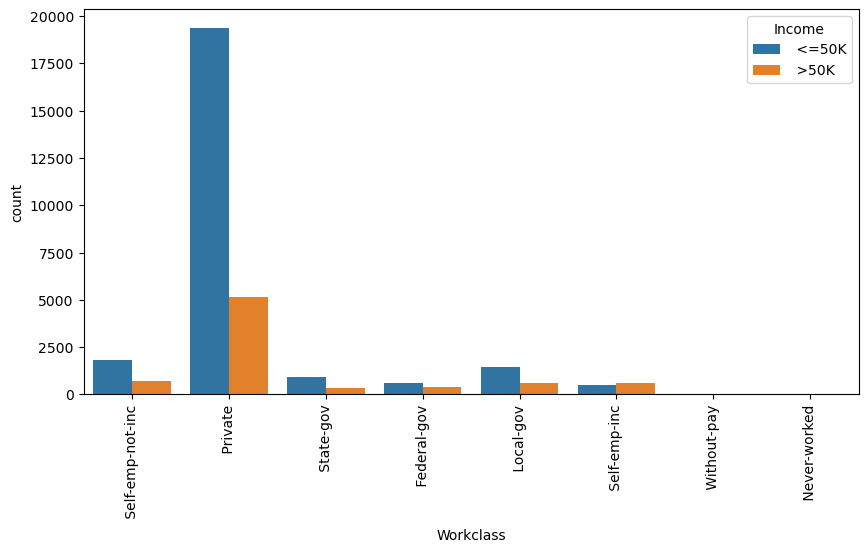

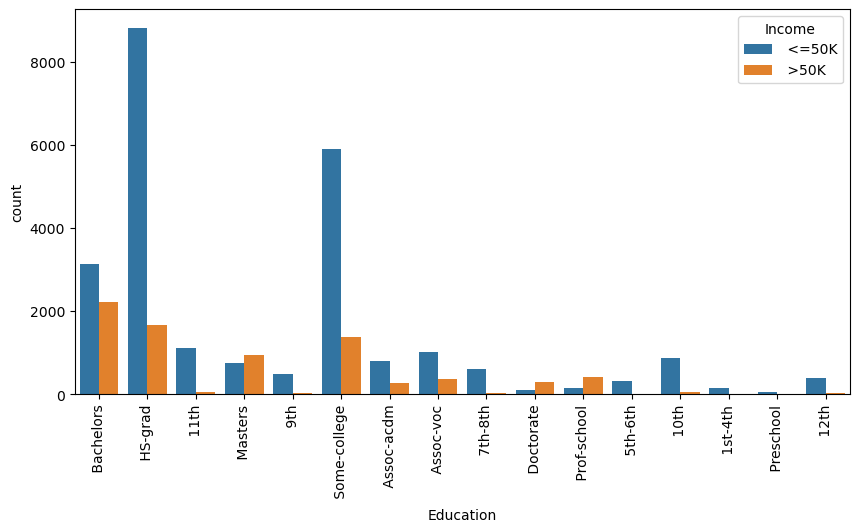

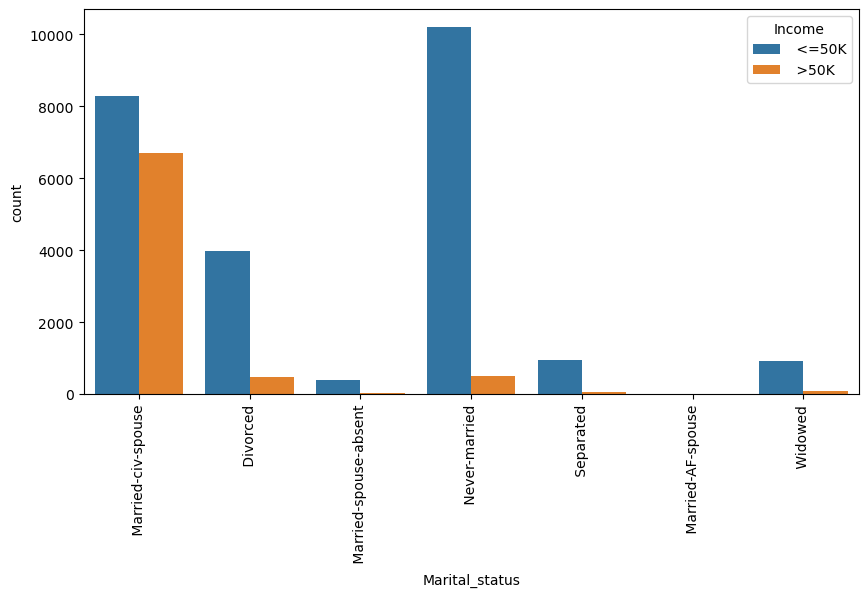

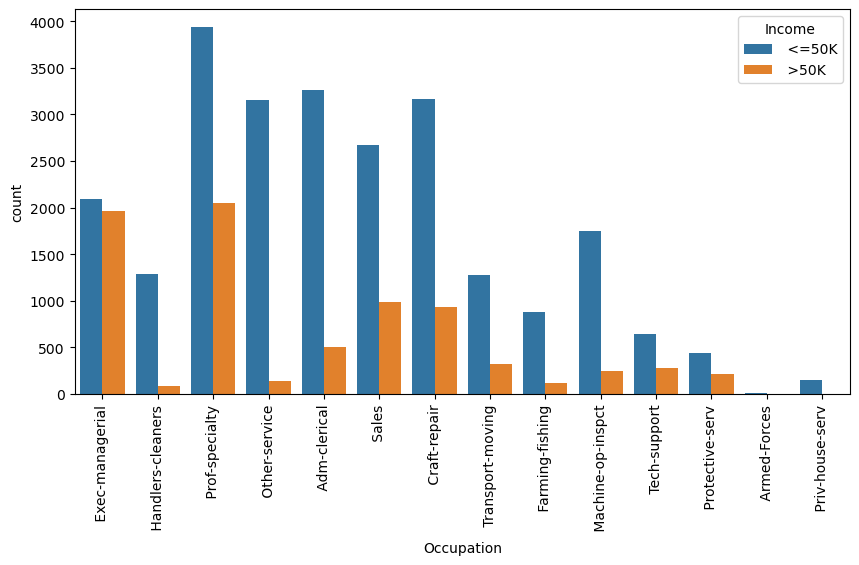

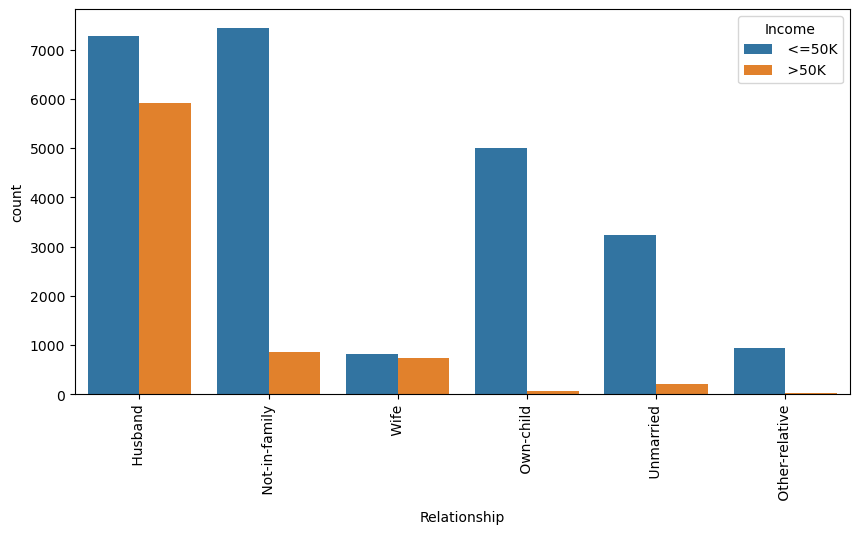

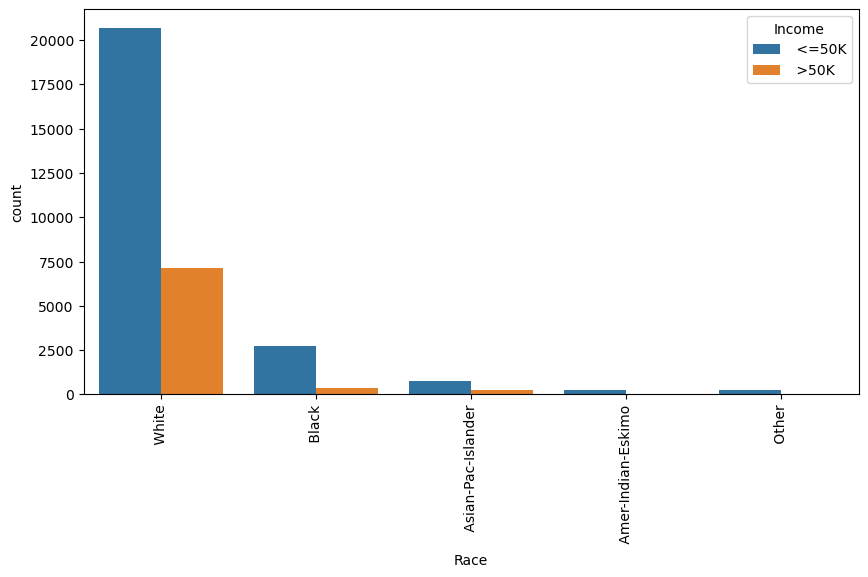

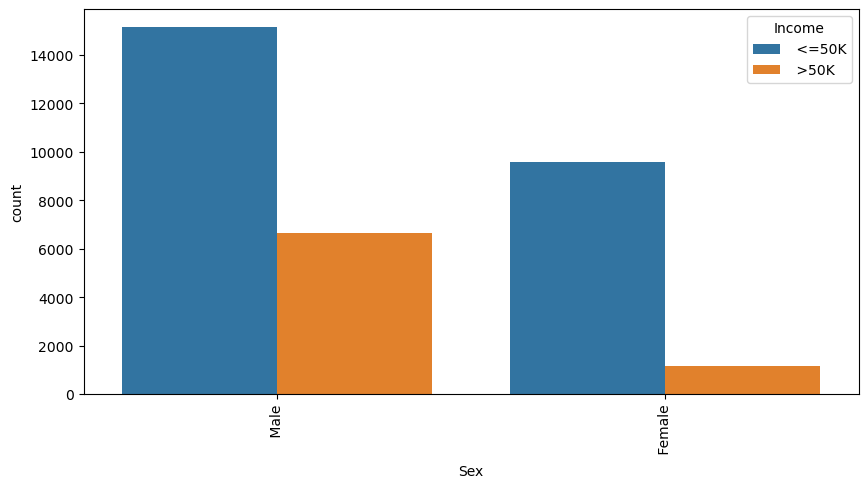

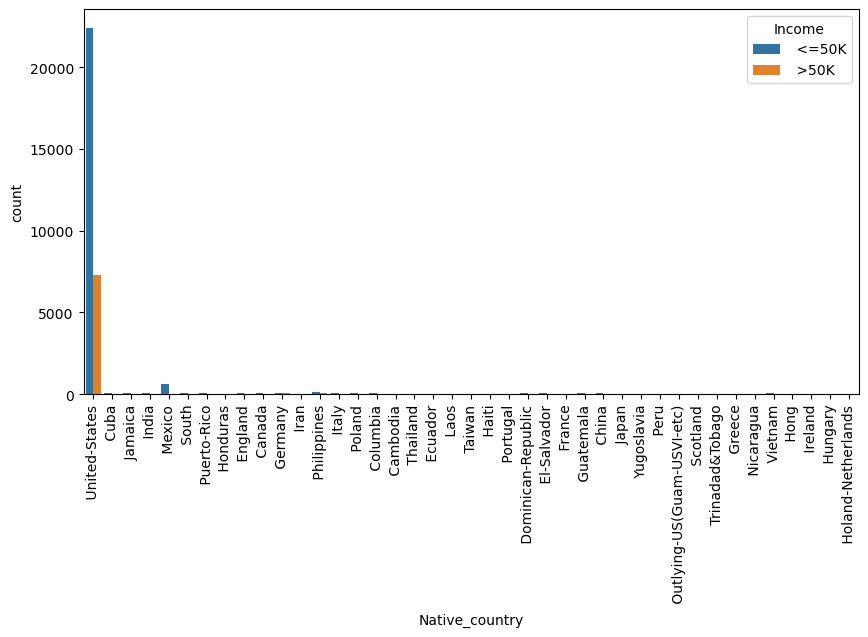

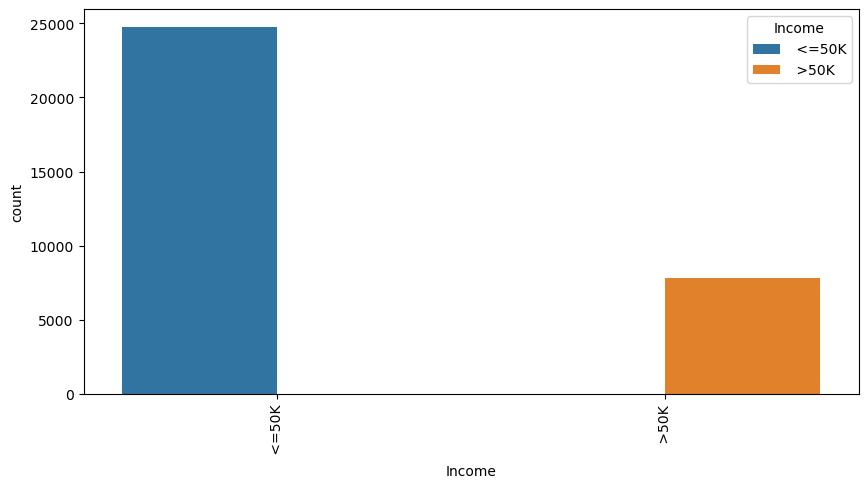

In [26]:
# plotting count of the individual features

for i in census[cat_cols]:
    plt.figure(figsize=(10,5))
    chart = sns.countplot(x=i,data=census,hue='Income')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

OBSERVATIONS:

1.The majority of the population works in the private sector and the majority has an income <= 50k

2.There is the smallest number of those who either worked and did not work without pay

3.most of the population earning <=50k is high school graduate

4.Most people earning> = 50k have Bachelors in some fields

5.Most people who are married earn> = 50k and who earn <= 50k are never married

6.Most of the population earning> = 50,000 are Exec-managerial or professors

7.The vast majority of them who earn profit <= 50k are Admin-clerical,sales,Craft-repair and Transport depts

8.Since most US people are of the Race white, their incomes are higher than those of race Black.

9.Majority of the Males are earning either <=50k or >=50k compared to females

10.According to the graph, the majority of the population around 90% are from the United States

11.On average, the majority of the population earns <= 50k

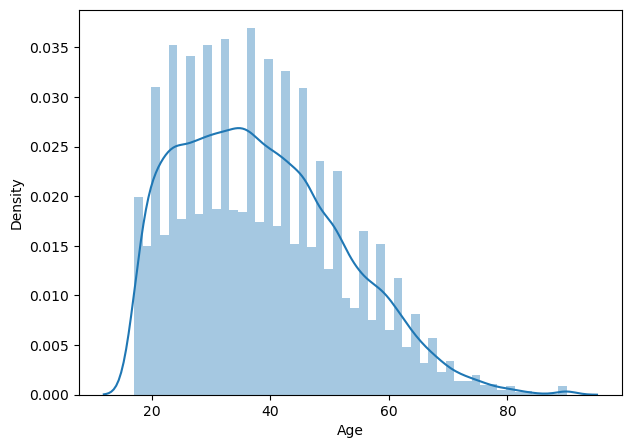

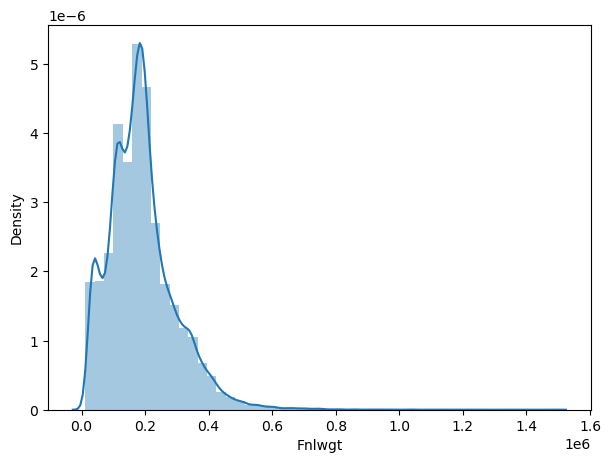

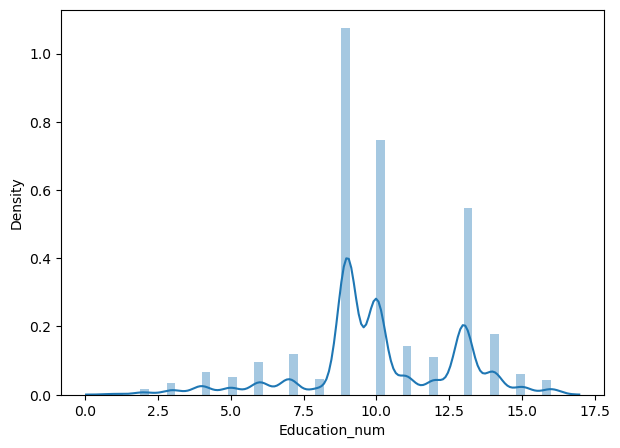

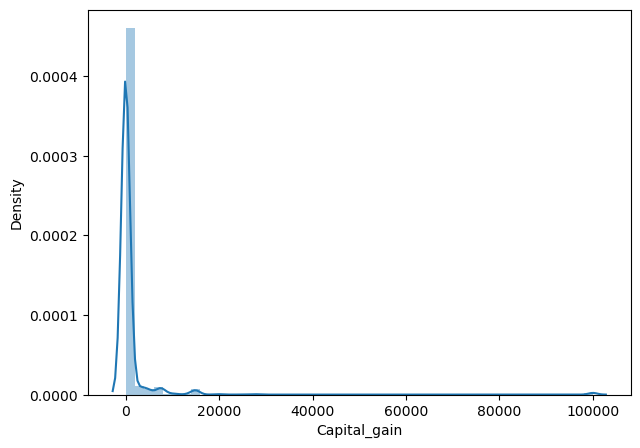

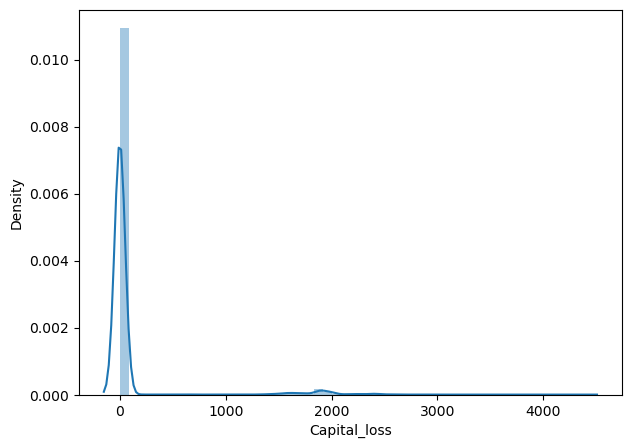

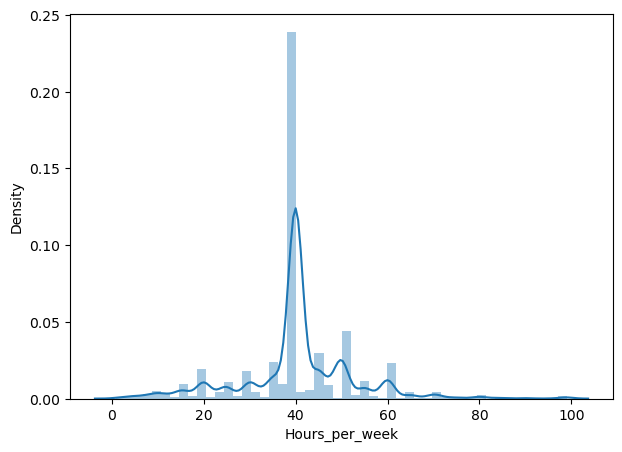

In [27]:
# plotting distplot to check the distributions of each numerical category feature

for i in num_cols:
    plt.figure(figsize=(7,5))
    sns.distplot(census[i],hist=True,kde=True)
    plt.show()

1.The above plot shows Capital Loss,Capital gain,Fnlwgt are right skewed

2.Age,Education_num,Hours_per_week are normally distributed

3.Most of the population works for about 40 hours per week.

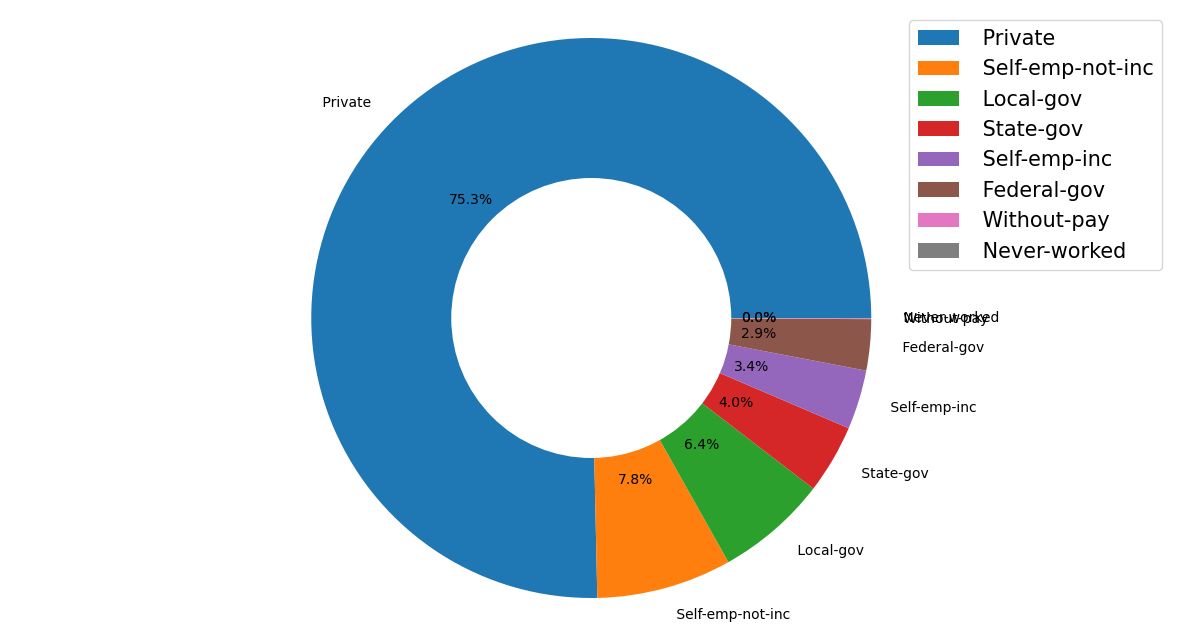

In [28]:
#Lets have a look on Workclass, how it is distributed
plt.figure(figsize=(15,8))
plt.pie( census["Workclass"].value_counts().values, labels = census["Workclass"].value_counts().index, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

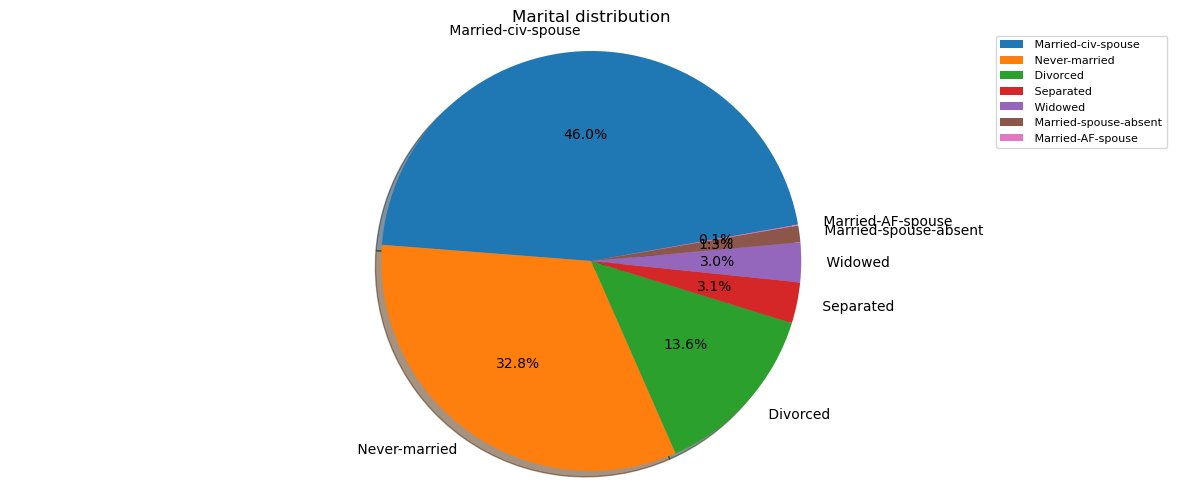

In [29]:
# Creating a pie chart for 'Marital status'
marital = census['Marital_status'].value_counts()
plt.figure(figsize=(15,6))
plt.pie(marital.values, labels = marital.index, startangle=10, shadow = True, autopct='%1.1f%%')
plt.title('Marital distribution')
plt.legend()
plt.legend(prop={'size': 8})
plt.axis('equal')
plt.show()

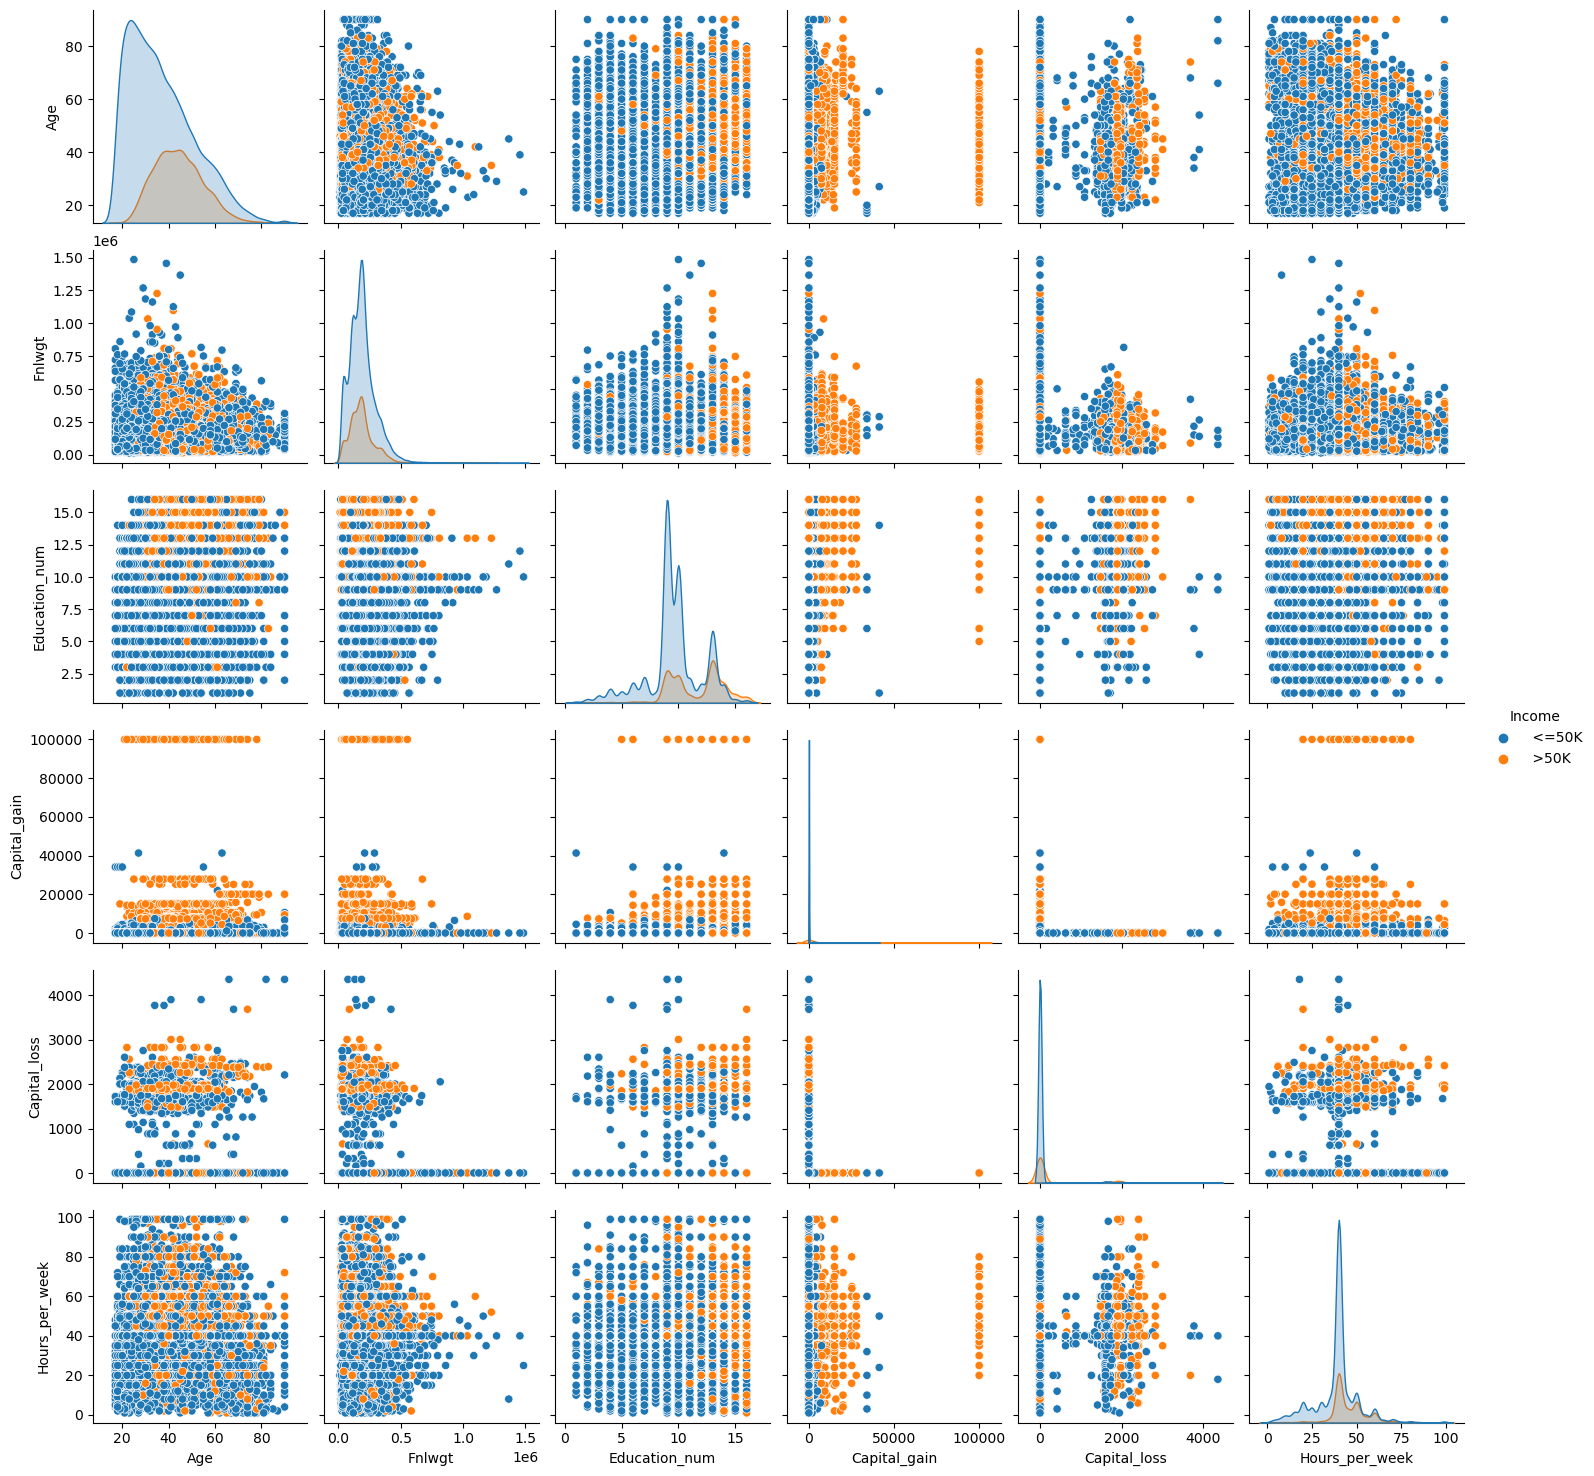

In [30]:
# plotting pairplot to check the relationship with multiple bivariate features
sns.pairplot(census,hue='Income')
plt.show()

1.Most of the population of all ages earn <= 50,000

2.Most of the entire educated population working 15 to 60 hours/week earn <=50k and fewer of them earn >=50k

3.Many who earn either <=50k or >=50k suffer a capital loss of 2000

### preprocessing pipeline 

In [31]:
#Lets check the entries in Capital_gain column
census["Capital_gain"].value_counts()

Capital_gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: count, Length: 119, dtype: int64

In [32]:
#we will replace 0 in Capital_gain column with mean of this column
census["Capital_gain"].replace(0, census["Capital_gain"].mean(),inplace = True)

In [33]:
#Lets check the entries in Capital_loss column
census["Capital_loss"].value_counts()

Capital_loss
0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: count, Length: 92, dtype: int64

In [34]:
#Capital_loss columns have 95.33% of entries that contains 0, so we will drop this column
census.drop(columns = "Capital_loss", inplace = True)

In [35]:
#lets replace Target column(Income) into binary codes to visualize heatmap

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
census['Income'] = le.fit_transform(census['Income'])

In [37]:
#First transform our data into label and features

x = census.drop(columns = "Income")
y = census["Income"]

In [38]:
#lets convert categorical data into numeric values, using label encoder
leb_enc = LabelEncoder()
for i in x.columns:
    if x[i].dtypes == "object":
        x[i] = leb_enc.fit_transform(x[i])

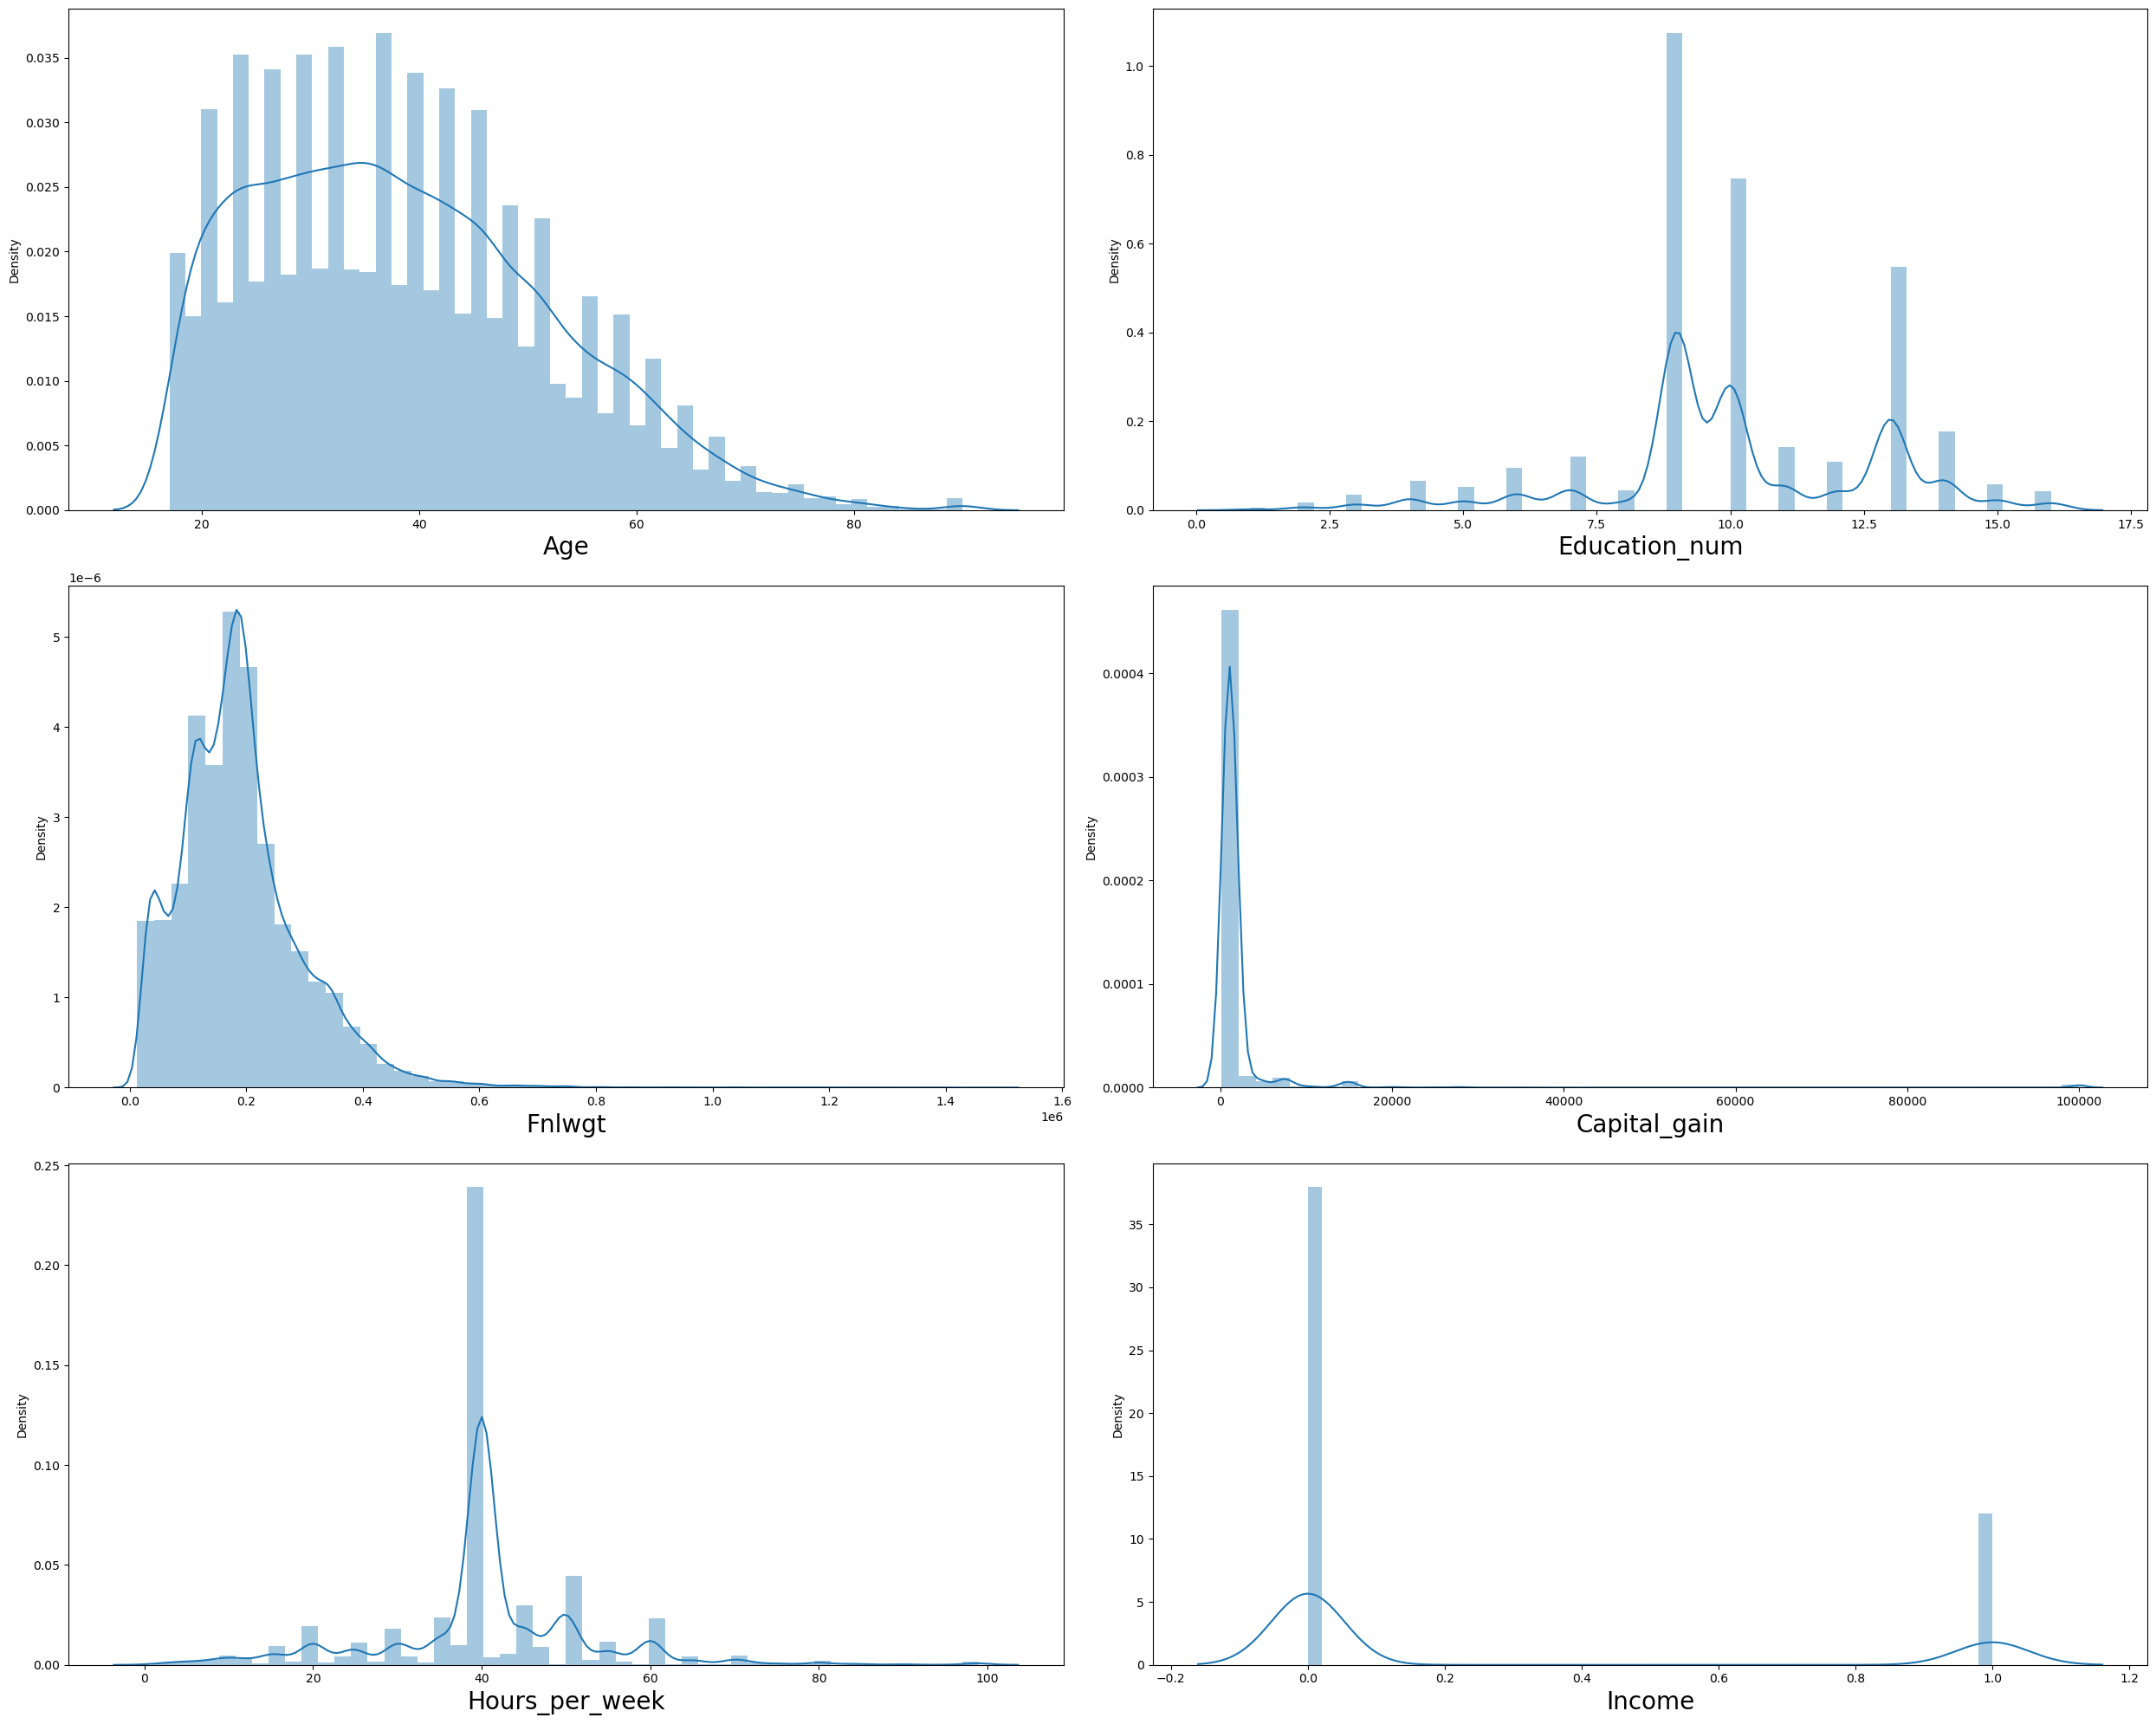

In [41]:
# check for outliers and Visualizing how data is distributed
plt.figure(figsize = (25,20))
plotnumber = 1
columns = ["Age","Education_num","Fnlwgt","Capital_gain","Hours_per_week","Income"]
for column in census[columns]:
    if plotnumber <=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(census[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [42]:
#remove outliers by applying zscore method
from scipy import stats
from scipy.stats import zscore
z_score = zscore(census[['Age','Education_num','Fnlwgt','Capital_gain','Hours_per_week']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
census= census[filtering_entry]
census

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,1077.615172,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,1077.615172,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,1077.615172,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,1077.615172,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,1077.615172,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,1077.615172,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,1077.615172,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,1077.615172,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,1077.615172,20,United-States,0


In [43]:
#First divide our data into label and features

x = census.drop(columns = "Income")
y = census["Income"]

In [45]:
census.drop(columns='Workclass')

,Age,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week,Native_country,Income
0,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,1077.615172,13,United-States,0
1,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,1077.615172,40,United-States,0
2,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,1077.615172,40,United-States,0
3,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,1077.615172,40,Cuba,0
4,37,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,1077.615172,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,1077.615172,38,United-States,0
32556,40,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,1077.615172,40,United-States,1
32557,58,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,1077.615172,40,United-States,0
32558,22,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,1077.615172,20,United-States,0


<Figure size 4000x2500 with 0 Axes>

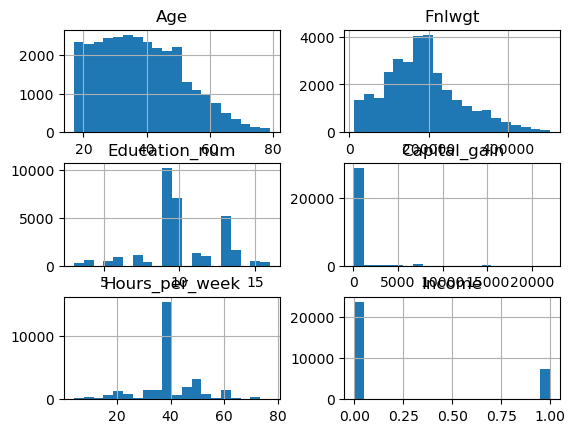

In [47]:
# find skewness by plotting histplot

plt.figure(figsize=(40,25))
census.hist(bins=20)
plt.show()

In [48]:
#Removing skewness
#Apply yeo-johnson Power transformation to remove skewness
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

x['Age'] = scaler.fit_transform(x['Age'].values.reshape(-1,1))
x['Fnlwgt'] = scaler.fit_transform(x['Fnlwgt'].values.reshape(-1,1))
x['Education_num'] = scaler.fit_transform(x['Education_num'].values.reshape(-1,1))
x['Capital_gain'] = scaler.fit_transform(x['Capital_gain'].values.reshape(-1,1))
x['Hours_per_week'] = scaler.fit_transform(x['Hours_per_week'].values.reshape(-1,1))

In [50]:
#lets convert categorical data into numeric values, using label encoder
leb_enc = LabelEncoder()
for i in x.columns:
    if x[i].dtypes == "object":
        x[i] = leb_enc.fit_transform(x[i])

In [51]:
#lets check the label count
y.value_counts()

Income
0    23848
1     7407
Name: count, dtype: int64

In [52]:
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over = SM.fit_resample(x,y)

DATA STANDARDIZATION

In [53]:
#lets seperate numerical data
num_data = pd.DataFrame(x_over,columns = ['Age','Fnlwgt','Education_num','Capital_gain','Hours_per_week'])

#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
x_num = scaler.fit_transform(num_data)
x_num = pd.DataFrame(x_num,columns=num_data.columns)

cat_data = x_over.drop(columns = ['Age','Fnlwgt','Education_num','Capital_gain','Hours_per_week'] )

#Lets join both categorical data and numerical data of our features

X = x_num.join(cat_data)
X

,Age,Fnlwgt,Education_num,Capital_gain,Hours_per_week,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country
0,0.826392,-1.166903,0.947295,-0.328253,-2.471169,5,8,2,3,0,4,1,38
1,-0.053688,0.443623,-0.667244,-0.328253,-0.201084,3,10,0,5,1,4,1,38
2,1.020035,0.631910,-1.424401,-0.328253,-0.201084,3,1,2,5,0,2,1,38
3,-0.972758,1.552366,0.947295,-0.328253,-0.201084,3,8,2,9,5,2,0,4
4,-0.136445,1.093611,1.368763,-0.328253,-0.201084,3,11,2,3,5,4,0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,-0.304858,-0.230080,0.766098,-0.328253,0.573102,5,7,2,9,5,4,0,38
47692,0.260153,2.076179,-0.080815,2.325862,0.732180,4,12,2,11,0,4,1,25
47693,0.300349,0.332449,1.368763,2.506131,-0.201084,3,11,2,9,0,4,1,38
47694,0.867594,-0.777894,-0.667244,-0.328253,-0.754336,5,10,2,12,0,4,1,38


MODEL BUILDING

In [54]:
# Lets find the best random state using LogisticRegression
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y_over,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.7715531700771553 on Random State 63


In [55]:
#lets split our data into train and test parts with best random_state
x_train,x_test,y_train,y_test = train_test_split(X, y_over, test_size = 0.25, random_state = max_rs )

In [56]:
#Lets check the model with LogisticRegression
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,predlr)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,predlr)*100}%")


print(f"Confusion Matrix : \n {confusion_matrix(y_test,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,predlr)}")

Accuracy Score: 77.15531700771552%
roc_auc_score: 77.16234924321662%
Confusion Matrix : 
 [[4566 1435]
 [1289 4634]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      6001
           1       0.76      0.78      0.77      5923

    accuracy                           0.77     11924
   macro avg       0.77      0.77      0.77     11924
weighted avg       0.77      0.77      0.77     11924



In [57]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_dt)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_dt)*100}%")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_dt)}")

Accuracy Score: 83.81415632338141%
roc_auc_score: 83.81423176051783%
Confusion Matrix : 
 [[5029  972]
 [ 958 4965]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      6001
           1       0.84      0.84      0.84      5923

    accuracy                           0.84     11924
   macro avg       0.84      0.84      0.84     11924
weighted avg       0.84      0.84      0.84     11924



In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_rf)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_rf)*100}%")


print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

Accuracy Score: 88.78731969137873%
roc_auc_score: 88.80061016337449%
Confusion Matrix : 
 [[5207  794]
 [ 543 5380]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      6001
           1       0.87      0.91      0.89      5923

    accuracy                           0.89     11924
   macro avg       0.89      0.89      0.89     11924
weighted avg       0.89      0.89      0.89     11924



In [59]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn = kn.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test,pred_kn)*100}%")
print(f"roc_auc_score: {roc_auc_score(y_test,pred_kn)*100}%")


print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_kn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_kn)}")

Accuracy Score: 85.34887621603488%
roc_auc_score: 85.39340044147632%
Confusion Matrix : 
 [[4716 1285]
 [ 462 5461]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.91      0.79      0.84      6001
           1       0.81      0.92      0.86      5923

    accuracy                           0.85     11924
   macro avg       0.86      0.85      0.85     11924
weighted avg       0.86      0.85      0.85     11924

